## 1. 随机语句生成
基于给定的Chomsky范式语法树，随机语言生成

In [1]:
import random

grammar = """
article = noun ### sentence sentence
sentence = adj noun verb noun2 。| verb noun2 ! 
adj = adj_single | adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
null =  
"""

def build_grammar(grammar):
    grammar_pattern = {}
    for line in grammar.split('\n'):
        if not line: continue
        statement, expression = line.split('=')
        grammar_pattern[statement.strip()] = [e.split() for e in expression.split('|')]
    return grammar_pattern

def generate(grammar_pattern, statement):
    if statement not in grammar_pattern:
        return statement
    expression = random.choice(grammar_pattern[statement])
    tokens = [generate(grammar_pattern, e) for e in expression]
    
    return ''.join(tokens)
        
grammar_pattern = build_grammar(grammar)
generate(grammar_pattern, 'article')

'男人###静静看着皮球!猫安静地看着皮球。'

## 2.BFS & DFS

DFS
visiting a need visit []
visiting c need visit ['b']
visiting g need visit ['b']
visiting b need visit []
visiting e need visit ['f', 'd']
visiting f need visit ['d']
visiting d need visit []
BFS
visiting a need visit []
visiting c need visit ['b']
visiting b need visit ['g']
visiting g need visit ['e', 'f', 'd']
visiting e need visit ['f', 'd']
visiting f need visit ['d']
visiting d need visit []


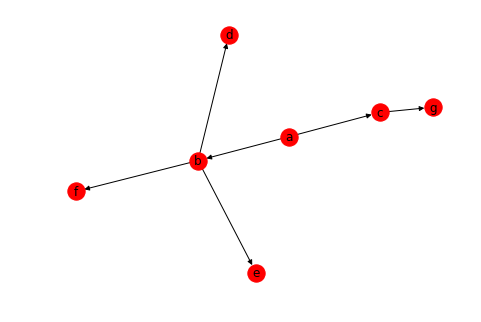

In [2]:
a,b,c,d,e,f,g = 'a','b','c','d','e','f','g'
tree = {
    a: {b,c},
    b: {d,e,f},
    c: {g}
}
import networkx

tree = networkx.DiGraph(tree)
%matplotlib inline
networkx.draw(tree, with_labels=True)

def search(G, start, visit_order):
    need_visited = [start]
    
    while need_visited:
        visit = need_visited.pop(0)
        print('visiting',visit, 'need visit', need_visited)
        if visit not in G:
            continue
        need_visited = visit_order(need_visited, list(G[visit]))
        
def new_nodes_first(need_visited, new_nodes):
    return new_nodes + need_visited

def old_nodes_first(need_visited, new_nodes):
    return need_visited + new_nodes

from functools import partial
dfs = partial(search, visit_order = new_nodes_first)
bfs = partial(search, visit_order = old_nodes_first)

print("DFS")
dfs(tree, a)
print("BFS")
bfs(tree, a)

## 3.图搜索
一个基于航线的图搜索例子（最短路径bfs）

### 3.1 课堂上的版本
这里使用有向图，因为有环所以要加终止条件（这里终止条件是所有的node都被visited一遍）。在所有节点只遍历一边的情况下，找到从起点到终点的可能路径
- 所有node最多被visit一遍
- 这个方法不能找到所有可能的路径，只能找到一部分

total counter 17


[['Shenzhen', 'Singapore'], ['Shenzhen', 'Beijing', 'Guangzhou', 'Singapore']]

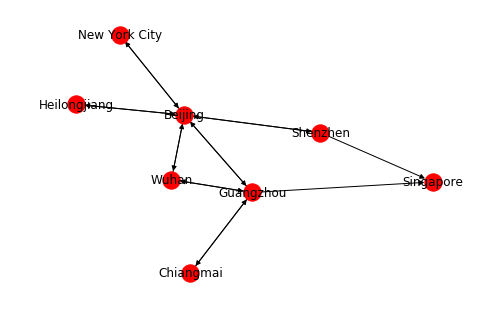

In [3]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

import networkx
air_route = networkx.DiGraph(air_route)
%matplotlib inline
networkx.draw(air_route, with_labels=True)

def search(G, start, end):
    counter = 0
    pathes = [[start]] 
    seen = set()
    searched_pathes = []
    while pathes:
        counter += 1
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen:
            #find a loop in this path            
            continue

        for city in G[frontier]:
            updated_path = path + [city]
            pathes = pathes + [updated_path]
            if city == end:
                searched_pathes.append(updated_path)
        seen.add(frontier)
    print('total counter',counter)
    return searched_pathes
        
search(air_route, SZ, SG) 

### 3.2 找到所有可能的路径
基于上一个方法做的改动
- 并不保证每个node之走一遍
- 可以找到所有可能的路径

In [4]:
def search(G, start, end):
    counter = 0
    pathes = [[start]] 
    searched_pathes = []
    while pathes:
        counter += 1
        path = pathes.pop(0)
        frontier = path[-1]

        for city in G[frontier]:
            if city in path: #如果新加入的city会使path构成环，则不加入这条path
                continue
            updated_path = path + [city]
            pathes = pathes + [updated_path]
            if city == end:
                searched_pathes.append(updated_path)
    print('total counter',counter)
    return searched_pathes
        
search(air_route, SZ, SG)

total counter 13


[['Shenzhen', 'Singapore'],
 ['Shenzhen', 'Beijing', 'Guangzhou', 'Singapore'],
 ['Shenzhen', 'Beijing', 'Wuhan', 'Guangzhou', 'Singapore']]